In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [11]:
from seirsplus.networks import generate_demographic_contact_network, household_country_data
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

In [56]:
random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N * 0.001)

demographic_graphs, _, _ = generate_demographic_contact_network(
    N=N, 
    demographic_data=household_country_data('US'),
    distancing_scales=[0.7], 
    isolation_groups=[],
)

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10

Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [57]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel

test_model = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED,
    transition_mode = "time_in_state",
)

In [58]:
for i in range(1000):
    if test_model.X[i] == test_model.E:
        print(i)

926


In [59]:
sim_correlated = SimulationRunner(
    model=test_model,
    pooling_strategy='correlated',
    T = 15,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    verbose=True,
    save_results=False,
)

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]


Running simulation with seed 0 for strategy correlated...


In [60]:
sim_correlated.run_simulation()

# TODO: understand:
# - why is model.run_iteration() happening every 0.01 days in the beginning, and what's the deal with propensity sum = 0?
# - model.t jumps to 20 after day 5. This is a bug.

    calling model.run_iteration(), time:  0 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Running screening for group 0 on day 0...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 48.64it/s]


Screening day:  0  self.model.t:  0.01
    calling model.run_iteration(), time:  0.01 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  0.02 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  0.03 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  0.04 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  0.05 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  0.060000000000000005 , propensities.sum():  0.0 ,

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 74.74it/s]


Screening day:  1  self.model.t:  1.0000000000000007
    calling model.run_iteration(), time:  1.0000000000000007 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  1.0100000000000007 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  1.0200000000000007 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  1.0300000000000007 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  1.0400000000000007 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    cal

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 61.29it/s]


Screening day:  2  self.model.t:  2.0000000000000013
    calling model.run_iteration(), time:  2.0000000000000013 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  2.010000000000001 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  2.020000000000001 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  2.0300000000000007 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  2.0400000000000005 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calli

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 43.00it/s]


Screening day:  3  self.model.t:  3.00999999999998
    calling model.run_iteration(), time:  3.00999999999998 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  3.0199999999999796 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  3.0299999999999794 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  3.039999999999979 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  3.049999999999979 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling m

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 35.92it/s]


Screening day:  4  self.model.t:  4.009999999999959
    calling model.run_iteration(), time:  4.009999999999959 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  4.019999999999959 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  4.0299999999999585 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  4.039999999999958 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling model.run_iteration(), time:  4.049999999999958 , propensities.sum():  0.0 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    calling 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.61it/s]


Screening day:  5  self.model.t:  5.009999999999938
    calling model.run_iteration(), time:  5.009999999999938 , propensities.sum():  100000.0 , propensities of node 926:  [     0. 100000.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.]
{'t': 5.010002124151599, 'transitionNode': 926, 'transitionNodeVL': 5.010002124151599, 'transitionType': 'EtoIPRE'}
    calling model.run_iteration(), time:  5.010002124151599 , propensities.sum():  4999999999.577196 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'t': 5.0100021242051485, 'transitionNode': 925, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
    calling model.run_iteration(), time:  5.0100021242051485 , propensities.sum():  3999999999.617196 , propensities of node 926:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'t': 5.010002124242

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 55.07it/s]


Screening day:  6  self.model.t:  20.010002125343927
Running screening for group 7 on day 7...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.97it/s]


Screening day:  7  self.model.t:  20.010002125343927
Running screening for group 8 on day 8...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 46.58it/s]


Screening day:  8  self.model.t:  20.010002125343927
Running screening for group 9 on day 9...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 67.54it/s]


Screening day:  9  self.model.t:  20.010002125343927
Running screening for group 0 on day 10...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 44.80it/s]


Screening day:  10  self.model.t:  20.010002125343927
Running screening for group 1 on day 11...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 32.54it/s]


Screening day:  11  self.model.t:  20.010002125343927
Running screening for group 2 on day 12...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 50.97it/s]


Screening day:  12  self.model.t:  20.010002125343927
Running screening for group 3 on day 13...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 38.97it/s]


Screening day:  13  self.model.t:  20.010002125343927
Running screening for group 4 on day 14...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 32.82it/s]


Screening day:  14  self.model.t:  20.010002125343927
Running screening for group 5 on day 15...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 65.93it/s]


Screening day:  15  self.model.t:  20.010002125343927
Running screening for group 6 on day 16...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 49.69it/s]


Screening day:  16  self.model.t:  20.010002125343927
Running screening for group 7 on day 17...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 30.07it/s]


Screening day:  17  self.model.t:  20.010002125343927
Running screening for group 8 on day 18...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 35.11it/s]


Screening day:  18  self.model.t:  20.010002125343927
Running screening for group 9 on day 19...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 59.20it/s]


Screening day:  19  self.model.t:  20.010002125343927
Running screening for group 0 on day 20...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 41.05it/s]


Screening day:  20  self.model.t:  20.010002125343927
    calling model.run_iteration(), time:  20.010002125343927 , propensities.sum():  600000.0 , propensities of node 926:  [     0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0. 100000.      0.
      0.      0.      0.      0.      0.]
{'t': 20.01000216779003, 'transitionNode': 925, 'transitionNodeVL': 12.0, 'transitionType': 'EtoIPRE'}


In [16]:
sim_correlated.model.transitions_log

[{'t': 5.010002124151599,
  'transitionNode': 926,
  'transitionNodeVL': 5.010002124151599,
  'transitionType': 'EtoIPRE'},
 {'t': 5.0100021242051485,
  'transitionNode': 925,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.010002124242381,
  'transitionNode': 546,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.0100021243415185,
  'transitionNode': 547,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.010002124667663,
  'transitionNode': 545,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 5.010002125343928,
  'transitionNode': 927,
  'transitionNodeVL': 0.0,
  'transitionType': 'StoE'},
 {'t': 20.01000216779003,
  'transitionNode': 925,
  'transitionNodeVL': 12.0,
  'transitionType': 'EtoIPRE'}]

In [28]:
res = []
for l in sim_correlated.model.transitions_log:
    if l["transitionNode"] == 926:
        res.append(l)

In [29]:
res

[{'t': 5.010002124151599,
  'transitionNode': 926,
  'transitionNodeVL': 5.010002124151599,
  'transitionType': 'EtoIPRE'}]

In [22]:
prop, cols = test_model.calc_propensities()

In [24]:
for col, p in zip(cols, prop[926]):
    print(col, p)

StoE 0.0
EtoIPRE 0.0
IPREtoISYM 0.0
IPREtoIASYM 0.0
ISYMtoR 0.0
ISYMtoH 0.0
IASYMtoR 0.0
HtoR 0.0
HtoF 0.0
StoQS 0.0
EtoQE 0.0
IPREtoQPRE 0.0
ISYMtoQSYM 0.0
IASYMtoQASYM 0.0
QStoQE 0.0
QEtoQPRE 0.0
QPREtoQSYM 100000.0
QPREtoQASYM 0.0
QSYMtoQR 0.0
QSYMtoH 0.0
QASYMtoQR 0.0
RtoS 0.0
_toS 0.0


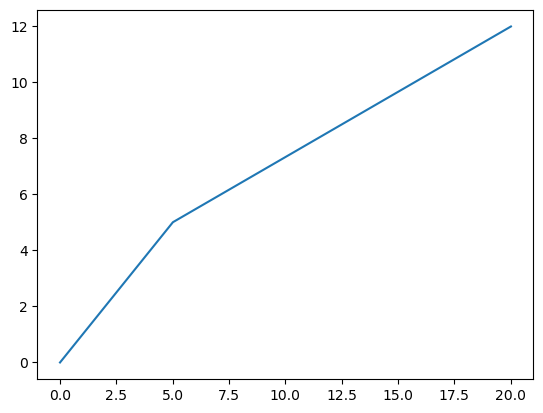

In [27]:
plt.plot(test_model.VL_over_time["time_points"], test_model.VL_over_time["VL_time_series"][926])

In [12]:
from collections import Counter

Counter(list(test_model.X.flatten()))

Counter({1: 994, 2: 4, 3: 1, 13: 1})

In [13]:
(test_model.X ==test_model.Q_pre)[926]

array([ True])

In [96]:
for i in range(1000):
    if test_model.X[i] == test_model.E:
        print(i)

545
546
547
927


In [17]:
for i in range(1000):
    if test_model.X[i] == test_model.I_pre:
        print(i)

925


In [18]:
for i in range(1000):
    if test_model.X[i] == test_model.Q_pre:
        print(i)

926


In [19]:
test_model.lamda_Q[926]

array([0.5])

In [20]:
test_model.timer_state[926]

array([15.00000004])

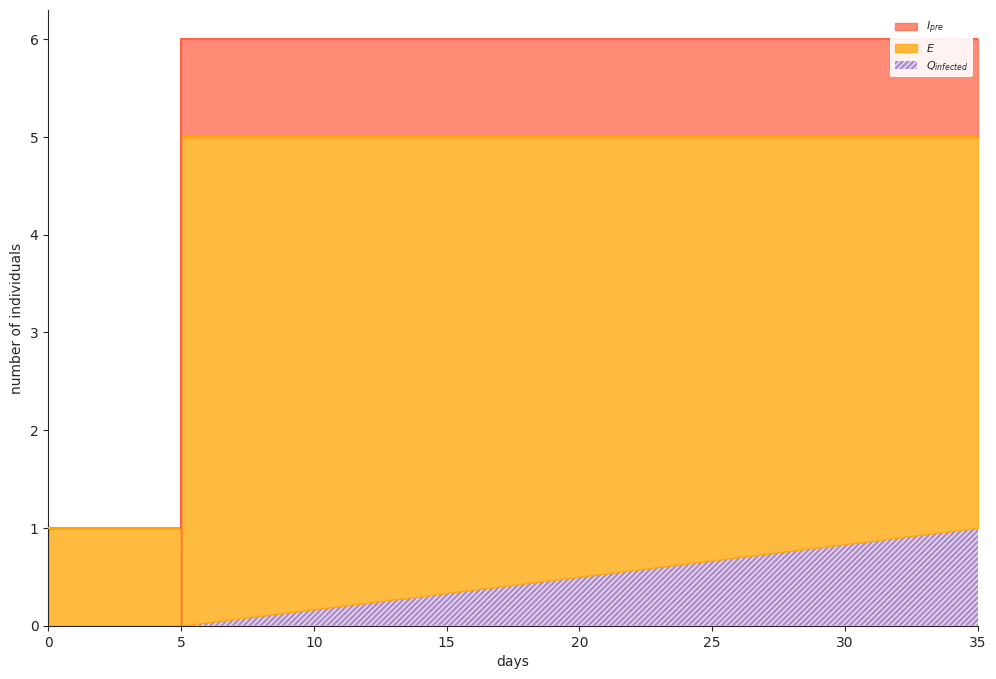

(<Figure size 1200x800 with 1 Axes>,
 <AxesSubplot: xlabel='days', ylabel='number of individuals'>)

In [56]:
sim_correlated.model.figure_infections(plot_percentages=False)

In [57]:
sim_correlated.model.tseries

array([0.00000000e+00, 1.00000000e-02, 2.00000000e-02, 3.00000000e-02,
       4.00000000e-02, 5.00000000e-02, 6.00000000e-02, 7.00000000e-02,
       8.00000000e-02, 9.00000000e-02, 1.00000000e-01, 1.10000000e-01,
       1.20000000e-01, 1.30000000e-01, 1.40000000e-01, 1.50000000e-01,
       1.60000000e-01, 1.70000000e-01, 1.80000000e-01, 1.90000000e-01,
       2.00000000e-01, 2.10000000e-01, 2.20000000e-01, 2.30000000e-01,
       2.40000000e-01, 2.50000000e-01, 2.60000000e-01, 2.70000000e-01,
       2.80000000e-01, 2.90000000e-01, 3.00000000e-01, 3.10000000e-01,
       3.20000000e-01, 3.30000000e-01, 3.40000000e-01, 3.50000000e-01,
       3.60000000e-01, 3.70000000e-01, 3.80000000e-01, 3.90000000e-01,
       4.00000000e-01, 4.10000000e-01, 4.20000000e-01, 4.30000000e-01,
       4.40000000e-01, 4.50000000e-01, 4.60000000e-01, 4.70000000e-01,
       4.80000000e-01, 4.90000000e-01, 5.00000000e-01, 5.10000000e-01,
       5.20000000e-01, 5.30000000e-01, 5.40000000e-01, 5.50000000e-01,
      